In [27]:
# Down-sampling involves randomly removing observations from the majority class 
# to prevent its signal from dominating the learning algorithm.
# Most common method is resampling without replacement

# - First, we'll separate observations from each class into different DataFrames.
# - Next, we'll resample the majority class without replacement, setting the number 
# of samples to match that of the minority class.
# - Finally, we'll combine the down-sampled majority class DataFrame with 
# the original minority class DataFrame.

In [28]:
# load necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [29]:
# module for resampling
from sklearn.utils import resample

In [30]:
# os.getcwd()

In [31]:
# os.listdir(os.getcwd())

In [32]:
# read the csv x_data file into Pandas 

all_param_df = pd.read_csv("..\\reduced_data\\all_param.csv")
all_param_df.shape


(39624, 351)

In [33]:
# separate classes in dataframes of success/failure
df_fail = all_param_df[all_param_df.suc_class==0]
df_succ = all_param_df[all_param_df.suc_class==1]

In [34]:
df_fail.shape

(38818, 351)

In [35]:
df_succ.shape

(806, 351)

In [36]:
# Downsample Majority class
df_fail_downsample = resample(df_fail, replace=False, n_samples=1000, random_state=2)

# combine success with downsampled majority class into new dataframe
df_downsampled = pd.concat([df_fail_downsample, df_succ])

# display new class counts
df_downsampled.suc_class.value_counts()

0    1000
1     806
Name: suc_class, dtype: int64

In [37]:
# # reindex the new upsampled dataframe
# df_upsampled.reindex()

In [38]:
# df_upsampled

In [39]:
# # read the csv y_data file into Pandas 
# y_parm_df = pd.read_csv("reduced_data\\y_params.csv")
# y_parm_df.shape

In [40]:
# using binary classification for logistic regression
y_class = df_downsampled['suc_class']

In [41]:
y_class

13716    0
4622     0
1350     0
30223    0
23274    0
        ..
39619    1
39620    1
39621    1
39622    1
39623    1
Name: suc_class, Length: 1806, dtype: int64

In [42]:
# create new X parameters df
x_data = df_downsampled.drop(['appid','maxccu','success_class','suc_class','followers']  , axis=1)

In [43]:
x_data.shape


(1806, 346)

In [44]:
# define training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_class, random_state=5)

In [45]:
# baseline example
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [46]:
# Pre-processing  - scale the data using the MinMaxScaler and perform some feature selection

from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler().fit(X_train)

In [47]:
# apply the trained scales (MinMax) to the training and testing data

X_train_scaled = x_scaler.transform(X_train)
X_test_scaled = x_scaler.transform(X_test)

In [48]:
# Train model
y = y_train
X = X_train_scaled

clf_2 = LogisticRegression(max_iter=1000).fit(X, y)

In [49]:
# Apply fitted model to test data - what accuracy?
print(f"Training Data Score: {clf_2.score(X_train, y_train)}")
print(f"Testing Data Score: {clf_2.score(X_test_scaled, y_test)}")

Training Data Score: 0.4446085672082718
Testing Data Score: 0.8097345132743363


In [50]:
# Understand precision, recall, f1 score with classification report for logistic classification
from sklearn.metrics import classification_report
predictions = clf_2.predict(X_test_scaled)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.75      0.98      0.85       248
           1       0.95      0.61      0.74       204

    accuracy                           0.81       452
   macro avg       0.85      0.79      0.80       452
weighted avg       0.84      0.81      0.80       452



In [52]:
# thinking about baseline results:
# Support is balanced due to sampling adjustments
# Percision: for no success: 75%, for successful games: 95%
# Recall: Fraction of positives found, 98% for 0, 61% for 1
# f1 score: 81%

<AxesSubplot:>

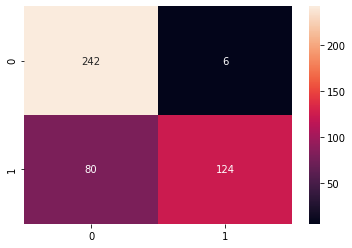

In [53]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = clf_2.predict(X_test_scaled)
cm2 = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm2, annot=True, fmt=".0f")

In [54]:
# Co-efficient importance

print(x_data.columns.shape, clf_2.coef_.shape)
new_col = np.reshape(clf_2.coef_, -1)
print(new_col.shape)
features_list = pd.DataFrame(zip(x_data.columns, new_col))
features_list = features_list.sort_values(by=[1], ascending=False)

import pandas
pandas.set_option('display.max_rows', 346)
features_list

(346,) (1, 346)
(346,)


,0,1
2,maxprice,4.949721
141,tagsingleplayer,3.021630
6,tagaction,2.522015
0,positive,2.429838
7,tagadventure,2.028094
4,totaltags,1.970402
11,tagrpg,1.804089
62,tagopenworld,1.573662
51,tagturnbased,1.518414
57,tagcoop,1.442133
